In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype
%matplotlib inline

In [2]:
data=pd.read_csv("main_data.csv")

In [3]:
data.head(2)

,Unnamed: 0,RecipeId,Name,Images,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
0,0,38,Low-Fat Berry Blue Frozen Dessert,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,4.5,4.0,170.9,2.5,1.3,...,3.2,4.0,1440,45,1485,average,4,4.0,5.0,4.25
1,1,39,Biryani,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,3.0,1.0,1110.7,58.8,16.6,...,63.4,6.0,25,240,265,average,25,3.0,3.0,3.00


In [4]:
data = data.drop(columns=['Unnamed: 0','AggregatedRating','ReviewCount'])

In [5]:
dataNoNA = data.dropna()

In [6]:
dataNoNA.isnull().sum()

RecipeId               0
Name                   0
Images                 0
RecipeCategory         0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeServings         0
CookTime               0
PrepTime               0
TotalTime              0
Review_Class           0
IngredientsCount       0
minimum_rating         0
maximum_rating         0
mean_of_rating         0
dtype: int64

In [7]:
print(dataNoNA.shape)

(173526, 22)


In [8]:
#Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier
#df.time_diff.quantile([0.25,0.5,0.75])

for column in data:
    if is_numeric_dtype(data[column]):
        first = data[column].quantile(.25)
        third = data[column].quantile(.75)
        iqr = third-first
        value = (1.5*iqr)+third
        print(column+' : '+str(round(value,2)))


RecipeId : 809553.5
Calories : 1061.45
FatContent : 60.1
SaturatedFatContent : 24.75
CholesterolContent : 264.05
SodiumContent : 1795.55
CarbohydrateContent : 108.55
FiberContent : 10.3
SugarContent : 41.0
ProteinContent : 57.25
RecipeServings : 14.0
CookTime : 97.5
PrepTime : 35.0
TotalTime : 145.0
IngredientsCount : 17.5
minimum_rating : 8.0
maximum_rating : 5.0
mean_of_rating : 6.5


In [9]:
dataClean = dataNoNA[(dataNoNA.Calories<=1061.45) & (dataNoNA.FatContent<=60.1) & (dataNoNA.SaturatedFatContent<=24.75)& 
                     (dataNoNA.CholesterolContent<=264.05)& (dataNoNA.SodiumContent<=1795.55)& (dataNoNA.CarbohydrateContent<=108.55)& 
                     (dataNoNA.FiberContent<=10.3)& (dataNoNA.SugarContent<=41)& (dataNoNA.ProteinContent<=57.25)]

In [10]:
dataClean.shape

(142784, 22)

In [11]:
dataCleanFinal = dataClean[(dataClean.TotalTime<=1440)]

In [12]:
dataCleanFinal.shape

(141993, 22)

In [13]:
Final_Data = dataCleanFinal

In [14]:
Final_Data.head(2)

,RecipeId,Name,Images,RecipeCategory,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
4,42,Cabbage Soup,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,103.6,0.4,0.1,0.0,959.3,25.1,...,4.3,4.0,30,20,50,average,5,0.0,5.0,2.666667
7,45,Buttermilk Pie With Gingersnap Crumb Crust,"""https://img.sndimg.com/food/image/upload/w_55...",Pie,228.0,7.1,1.7,24.5,281.8,37.5,...,4.2,8.0,50,30,80,average,8,0.0,5.0,2.666667


C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


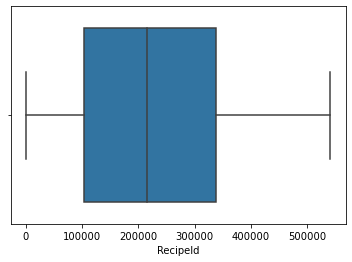

In [15]:
sns.boxplot(Final_Data['RecipeId'], orient = 'v')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Recipe Id')

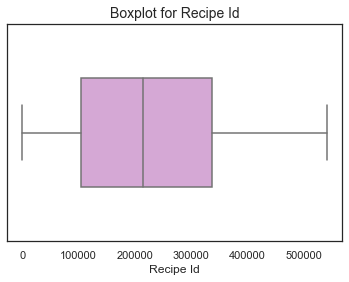

In [16]:
# set style
sns.set(style='white')

# set figure size
#fig. ax = plt.subplots(figsize=(10,2))

# create boxplot
sns.boxplot(Final_Data['RecipeId'], color="plum", width = .5)

# title and x-label
plt.title('Boxplot for Recipe Id', fontsize=14)
plt.xlabel('Recipe Id')



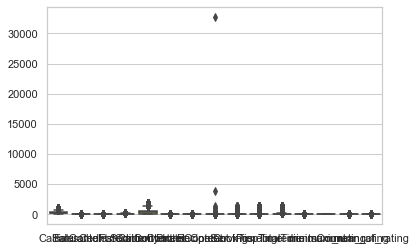

In [17]:
# set stlye
sns.set(style ='whitegrid')

g = sns.boxplot(data=Final_Data [['Calories','FatContent','SaturatedFatContent','CholesterolContent',
                                 'SodiumContent','CarbohydrateContent','ProteinContent','RecipeServings', 
                                 'CookTime','PrepTime','TotalTime','Review_Class','IngredientsCount',
                                 'minimum_rating','maximum_rating','mean_of_rating']])

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Calories')

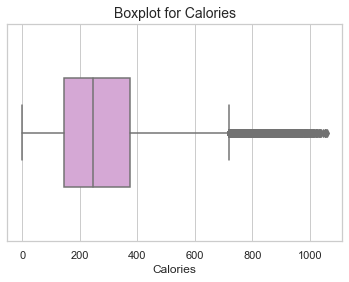

In [18]:
sns.boxplot(Final_Data['Calories'], color="plum", width = .5)

plt.title('Boxplot for Calories', fontsize=14)
plt.xlabel('Calories')


C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'FatContent')

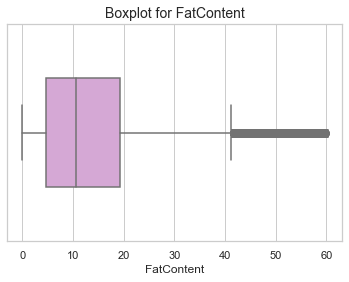

In [19]:
sns.boxplot(Final_Data['FatContent'], color="plum", width = .5)

plt.title('Boxplot for FatContent', fontsize=14)
plt.xlabel('FatContent')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SaturatedFatContent')

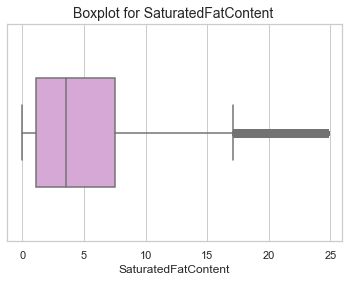

In [20]:
sns.boxplot(Final_Data['SaturatedFatContent'], color="plum", width = .5)

plt.title('Boxplot for SaturatedFatContent ', fontsize=14)
plt.xlabel('SaturatedFatContent')


C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'minimum_rating')

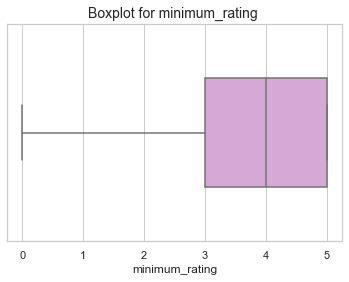

In [21]:
sns.boxplot(Final_Data['minimum_rating'], color="plum", width = .5)

plt.title('Boxplot for minimum_rating ', fontsize=14)
plt.xlabel('minimum_rating')




C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SodiumContent')

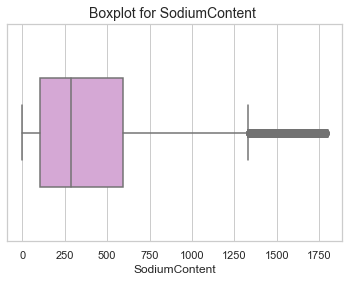

In [22]:
sns.boxplot(Final_Data['SodiumContent'], color="plum", width = .5)

plt.title('Boxplot for SodiumContent ', fontsize=14)
plt.xlabel('SodiumContent')



C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'CarbohydrateContent')

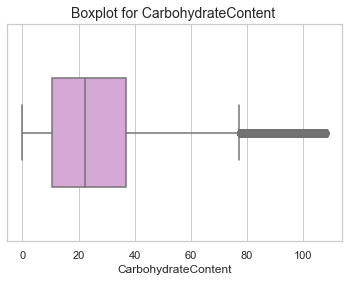

In [23]:
sns.boxplot(Final_Data['CarbohydrateContent'], color="plum", width = .5)

plt.title('Boxplot for CarbohydrateContent ', fontsize=14)
plt.xlabel('CarbohydrateContent')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'ProteinContent')

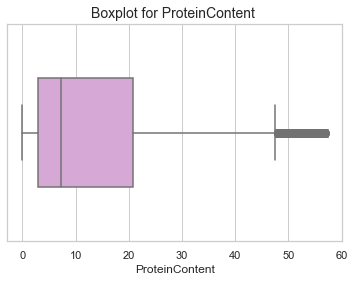

In [24]:
sns.boxplot(Final_Data['ProteinContent'], color="plum", width = .5)

plt.title('Boxplot for ProteinContent ', fontsize=14)
plt.xlabel('ProteinContent')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'RecipeServings')

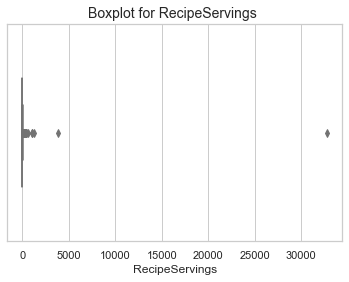

In [25]:
sns.boxplot(Final_Data['RecipeServings'], color="plum", width = .5)

plt.title('Boxplot for RecipeServings ', fontsize=14)
plt.xlabel('RecipeServings')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'CookTime')

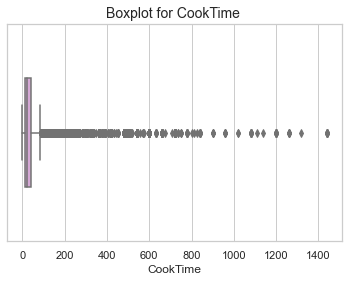

In [26]:
sns.boxplot(Final_Data['CookTime'], color="plum", width = .5)

plt.title('Boxplot for CookTime ', fontsize=14)
plt.xlabel('CookTime')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'PrepTime')

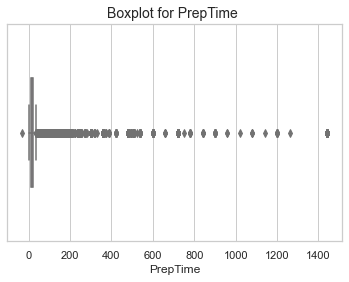

In [27]:
sns.boxplot(Final_Data['PrepTime'], color="plum", width = .5)

plt.title('Boxplot for PrepTime ', fontsize=14)
plt.xlabel('PrepTime')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'TotalTime')

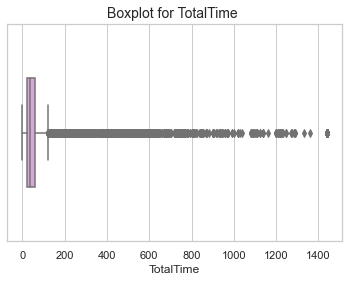

In [28]:
sns.boxplot(Final_Data['TotalTime'], color="plum", width = .5)

plt.title('Boxplot for TotalTime ', fontsize=14)
plt.xlabel('TotalTime')

In [29]:
#sns.boxplot(Final_Data['Review_Class'], color="plum", width = .5)

#plt.title('Boxplot for Review_Class ', fontsize=14)
#plt.xlabel('Review_Class')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'IngredientsCount')

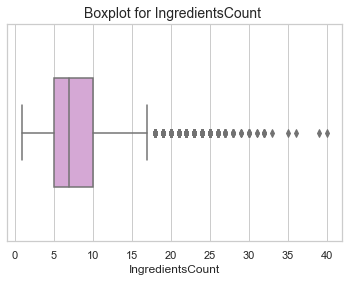

In [30]:
sns.boxplot(Final_Data['IngredientsCount'], color="plum", width = .5)

plt.title('Boxplot for IngredientsCount ', fontsize=14)
plt.xlabel('IngredientsCount')

In [31]:
#sns.boxplot(Final_Data[''], color="plum", width = .5)

#plt.title('Boxplot for maximum_rating ', fontsize=14)
#plt.xlabel('maximum_rating')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'mean_of_rating')

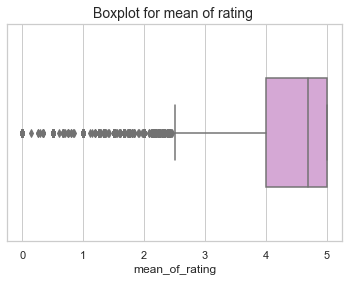

In [32]:
sns.boxplot(Final_Data['mean_of_rating'], color="plum", width = .5)

plt.title('Boxplot for mean of rating ', fontsize=14)
plt.xlabel('mean_of_rating')

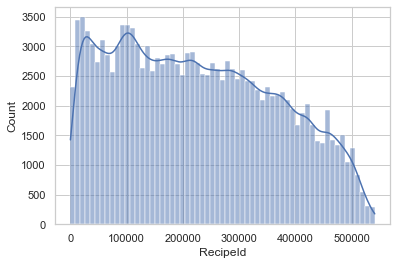

In [33]:
sns.histplot(x = 'RecipeId',data = Final_Data , kde =True )

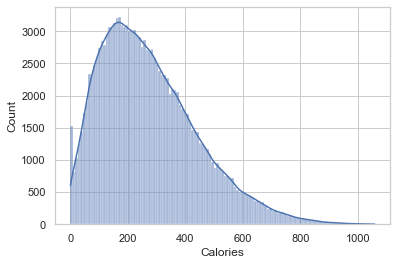

In [34]:
sns.histplot(x = 'Calories',data = Final_Data , kde =True )

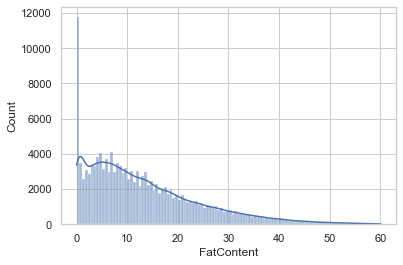

In [35]:
sns.histplot(x = 'FatContent',data = Final_Data , kde =True )

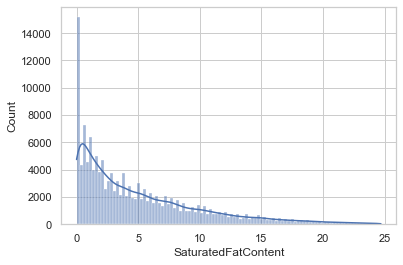

In [36]:
sns.histplot(x = 'SaturatedFatContent',data = Final_Data , kde =True )

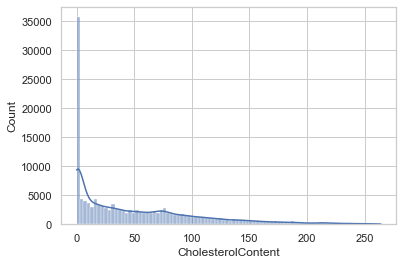

In [37]:
sns.histplot(x = 'CholesterolContent',data = Final_Data , kde =True )

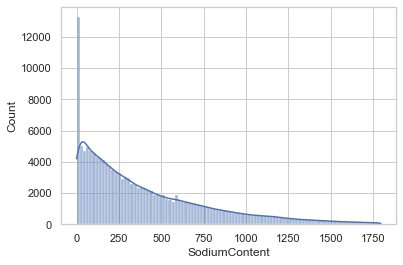

In [38]:
sns.histplot(x = 'SodiumContent',data = Final_Data , kde =True )

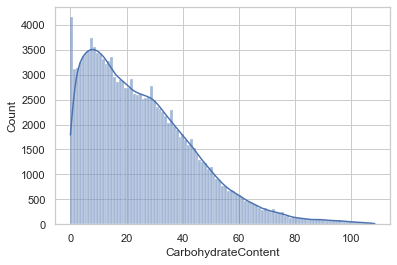

In [39]:
sns.histplot(x = 'CarbohydrateContent',data = Final_Data , kde =True )

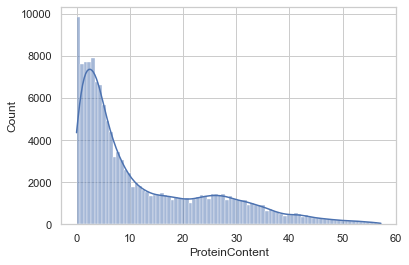

In [40]:
sns.histplot(x = 'ProteinContent',data = Final_Data , kde =True )

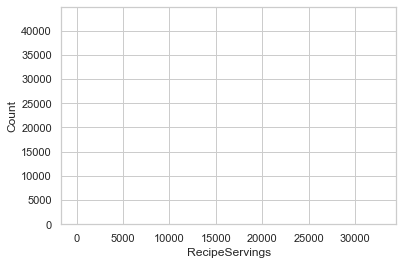

In [41]:
sns.histplot(x = 'RecipeServings',data = Final_Data )

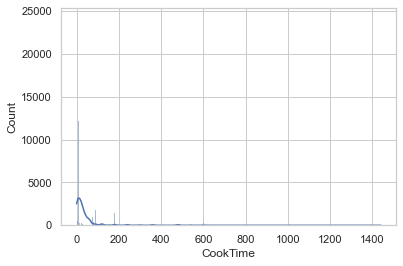

In [42]:
sns.histplot(x = 'CookTime',data = Final_Data , kde =True )

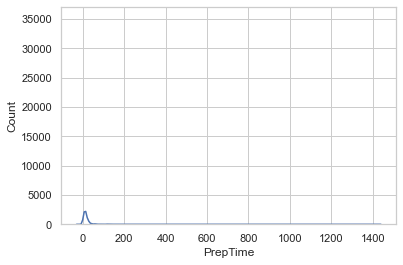

In [43]:
sns.histplot(x = 'PrepTime',data = Final_Data , kde =True )

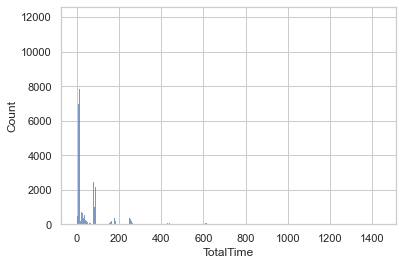

In [44]:
sns.histplot(x = 'TotalTime',data = Final_Data )

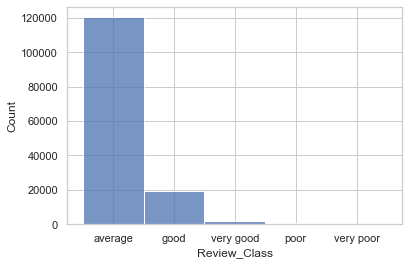

In [45]:
sns.histplot(x = 'Review_Class',data = Final_Data )

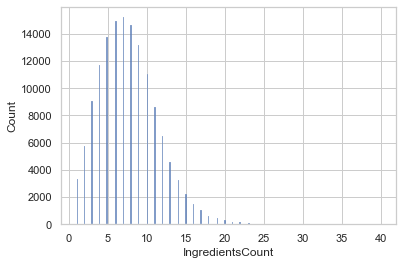

In [46]:
sns.histplot(x = 'IngredientsCount',data = Final_Data )

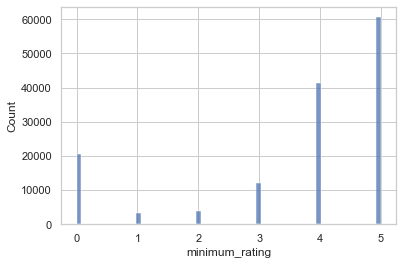

In [47]:
sns.histplot(x = 'minimum_rating',data = Final_Data )

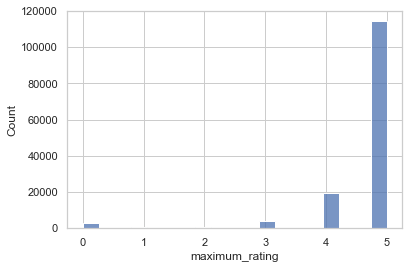

In [48]:
sns.histplot(x = 'maximum_rating',data = Final_Data )

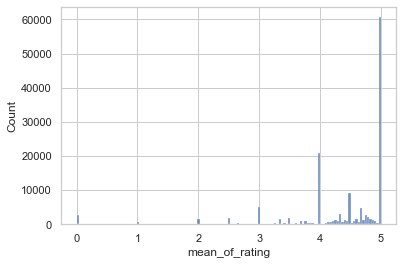

In [49]:
sns.histplot(x = 'mean_of_rating',data = Final_Data )